In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from keras.preprocessing.text import Tokenizer
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

# NLP¶
Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.

NLP is currently the focus of significant interest in the machine learning community. Some of the use cases for NLP are listed here:



*   Chatbots
*   Search(text and Audio)
* Text Classification
*   Sentiment Analysis
*   Recommendation Sysytem
*   Speech recognition


# What is Sentiment Analysis ?

Sentiment analysis refers to the use of natural language processing, text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study affective states and subjective information. Sentiment Analysis [2]: the process of understanding if a given text is talking positively or negatively about a given subject, aiming for brand monitoring.

## Preprocessing Yahoo Finance Dataset


In [3]:
import yfinance as yf

In [4]:
fd = yf.download("^NSEI",start="2020-06-30", end="2023-06-30")
fd

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-30,10382.599609,10401.049805,10267.349609,10302.099609,10302.099609,556200
2020-07-01,10323.799805,10447.049805,10299.599609,10430.049805,10430.049805,573600
2020-07-02,10493.049805,10598.200195,10485.549805,10551.700195,10551.700195,597400
2020-07-03,10614.950195,10631.299805,10562.650391,10607.349609,10607.349609,525200
2020-07-06,10723.849609,10811.400391,10695.099609,10763.650391,10763.650391,571200
...,...,...,...,...,...,...
2023-06-22,18853.599609,18886.599609,18759.500000,18771.250000,18771.250000,252700
2023-06-23,18741.849609,18756.400391,18647.099609,18665.500000,18665.500000,210600
2023-06-26,18682.349609,18722.050781,18646.699219,18691.199219,18691.199219,171300


In [5]:
nifty_50_df = fd.fillna(method='ffill')

What was the moving average of the various stocks?¶

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

In [6]:
nifty_50_df['SMA50'] = nifty_50_df['Close'].rolling(50).mean()

In [7]:
nifty_50_df.dropna(inplace=True)
nifty_50_df

,Open,High,Low,Close,Adj Close,Volume,SMA50
Date,,,,,,,
2020-09-07,11359.599609,11381.150391,11251.700195,11355.049805,11355.049805,560300,11117.212012
2020-09-08,11378.549805,11437.250000,11290.450195,11317.349609,11317.349609,572200,11137.517012
2020-09-09,11218.599609,11298.150391,11185.150391,11278.000000,11278.000000,728900,11154.476016
2020-09-10,11363.299805,11464.049805,11327.400391,11449.250000,11449.250000,679400,11172.427012
2020-09-11,11447.799805,11493.500000,11419.900391,11464.450195,11464.450195,554800,11189.569023
...,...,...,...,...,...,...,...
2023-06-22,18853.599609,18886.599609,18759.500000,18771.250000,18771.250000,252700,18297.262031
2023-06-23,18741.849609,18756.400391,18647.099609,18665.500000,18665.500000,210600,18314.324023
2023-06-26,18682.349609,18722.050781,18646.699219,18691.199219,18691.199219,171300,18331.588008


Text(0.5, 0, '')

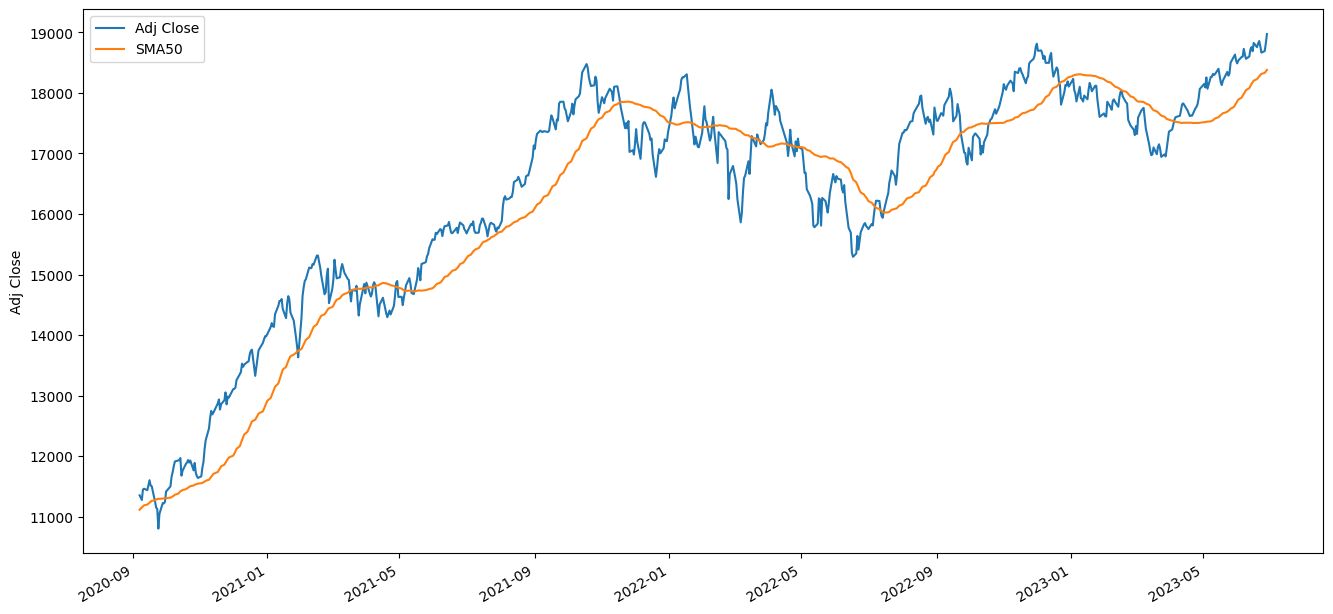

In [ ]:
# plotting Adj. Close price and simple moving average of 50 days using .plot() method
nifty_50_df[['Adj Close', 'SMA50']].plot(label='NIFTY50',
                                  figsize=(16, 8))
plt.title('Adj. Close price vs SMA 50')
plt.ylabel('Adj Close')
plt.xlabel(None)

Volume of Sales¶

Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

Text(0.5, 0, '')

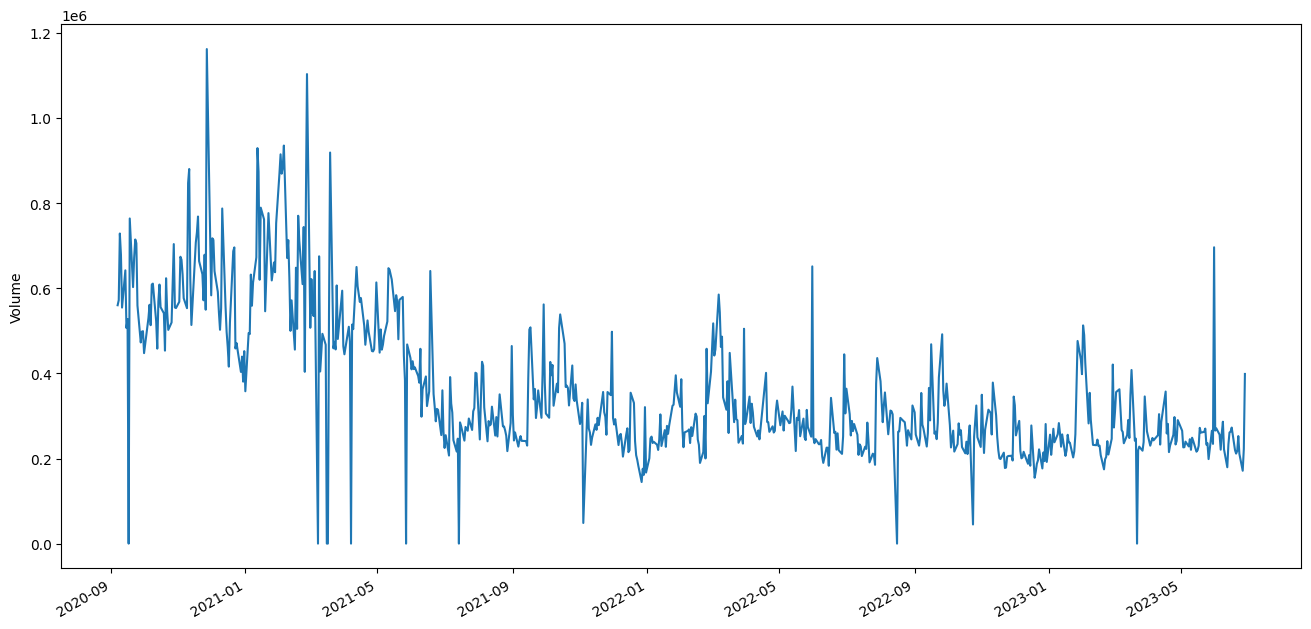

In [8]:
# plotting Volume price
nifty_50_df['Volume'].plot(label='NIFTY50',
                                  figsize=(16, 8))
plt.ylabel('Volume')
plt.xlabel(None)

In [81]:
nifty_50_df.describe()

,Open,High,Low,Close,Adj Close,Volume,SMA50,Daily Return
count,697.000000,697.000000,697.000000,697.000000,697.000000,6.970000e+02,697.000000,696.000000
mean,16382.425984,16460.357586,16273.800058,16372.712475,16372.712475,3.596588e+05,16116.341367,0.000786
std,1890.811671,1891.720514,1891.953217,1889.853879,1889.853879,1.696442e+05,2008.108108,0.009789
min,10910.400391,11015.299805,10790.200195,10805.549805,10805.549805,0.000000e+00,11117.212012,-0.047781
25%,15279.900391,15336.299805,15183.400391,15293.500000,15293.500000,2.445000e+05,14823.064961,-0.004396
50%,17087.349609,17186.900391,16950.300781,17072.599609,17072.599609,2.952000e+05,16955.228086,0.001226
75%,17797.199219,17863.000000,17697.099609,17786.800781,17786.800781,4.583000e+05,17562.138047,0.007232
max,18908.150391,19011.250000,18861.349609,18972.099609,18972.099609,1.162400e+06,18380.038008,0.047424


The provided descriptive statistics offer insights into the characteristics of the dataset, representing stock market data for a specific period. Here are some descriptive inferences:

1. **Stock Price Variation**: The dataset covers a considerable range of stock prices, with the lowest closing price at 10,805.55 rupees and the highest at 18,972.10 rupees.

2. **Volatility Measures**: The standard deviation of closing prices indicates significant volatility in the market, with prices varying by approximately 1,890.85 rupees around the mean.

3. **Trading Volume**: The trading volume ranges from 0 to 1,162,400 shares, suggesting varying levels of market activity during the observed period.

4. **Moving Average**: The 50-day Simple Moving Average (SMA50) provides a smoothed representation of the stock's price trend over time, averaging around 16,116.34 rupees.

5. **Daily Returns**: On average, the daily returns show a slight positive trend, with a mean return of approximately 0.0786% and a median return of approximately 0.1226%. However, the distribution exhibits variability, as evidenced by the standard deviation of 0.9789%.

6. **Market Trends**: The dataset captures market trends characterized by fluctuations in stock prices, with trading activity influenced by various factors such as economic conditions, company performance, and investor sentiment.


### Daily return of Stock on Average

In [9]:
nifty_50_df['Daily Return']=nifty_50_df['Adj Close'].pct_change()


<Axes: xlabel='Date'>

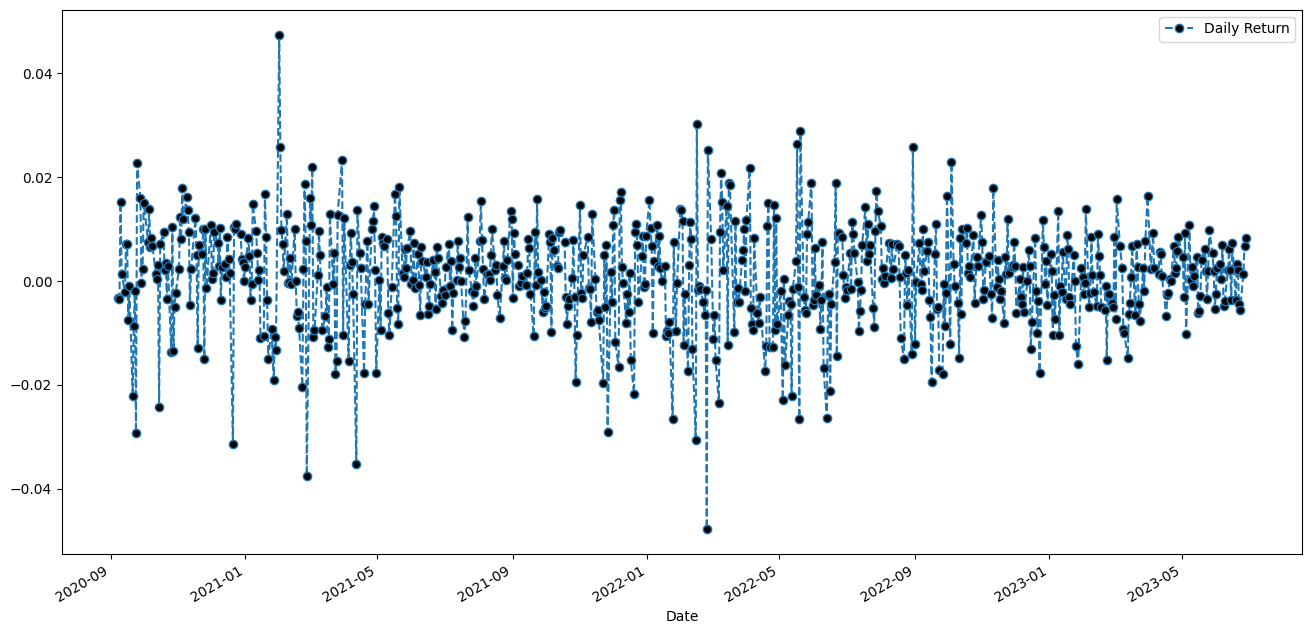

In [ ]:
# Plotting the daily return percentage

nifty_50_df['Daily Return'].plot(legend=True, linestyle='--', marker='o', markerfacecolor='black', figsize=(16,8))

Skewness: -0.38910360895811313
Kurtosis: 2.2183245972948984


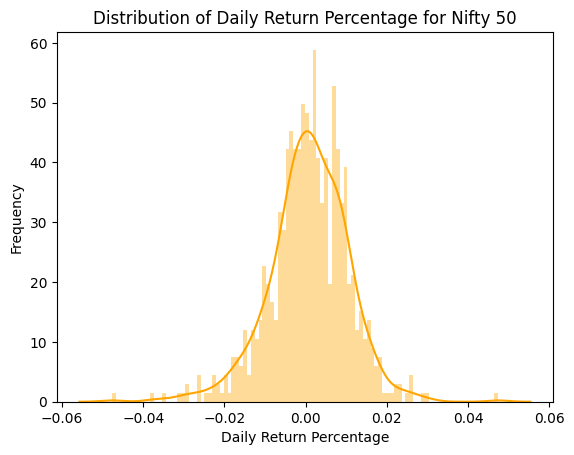

In [ ]:
# Plot distribution of daily return percentage
sns.distplot(nifty_50_df['Daily Return'].dropna(), bins=100, color='orange')
plt.ylabel('Frequency')
plt.xlabel('Daily Return Percentage')
plt.title('Distribution of Daily Return Percentage for Nifty 50')

# Calculate and print skewness and kurtosis
skewness = nifty_50_df['Daily Return'].skew()
kurtosis = nifty_50_df['Daily Return'].kurt()
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

## Preprocessing Times Of India Dataset

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

**Context** <br>
This news dataset is a persistent historical archive of noteable events in the Indian subcontinent from start-2001 to q2-2023, recorded in real-time by the journalists of India. It contains approximately 3.8 million events published by Times of India.

A majority of the data is focusing on Indian local news including national, city level and entertainment.


Time Range : Start Date: 2001-01-01 ; End Date: 2023-06-30

CSV Rows: 3,876,557


Columns:

- **publish_date:** Date of the article being published online in yyyyMMdd format
- **headline_category**: Category of the headline, ascii, dot delimited, lowercase values
- **headline_text**: Text of the Headline in English, only ascii characters


Times Group as a news agency, reaches out a very wide audience across Asia and drawfs every other agency in the quantity of English articles published per day. Due to the heavy daily volume (avg. 600 articles) over multiple years, this data offers a deep insight into Indian society, its priorities, events, issues and talking points and how they have unfolded over time.



In [11]:
df = pd.read_csv('/content/drive/MyDrive/india-news-headlines.csv', delimiter=',',encoding='latin-1')

In [12]:
df.tail(10)

,publish_date,headline_category,headline_text
3876547,20230630,city.goa,Yuri: We will question govt over sacking of un...
3876548,20230630,city.goa,Three of family end lives due to financial burden
3876549,20230630,city.goa,7;500 students with aptitude to learn advanced...
3876550,20230630,city.goa,Civic bodies told to collect labour cess
3876551,20230630,city.goa,Mapusa municipality decides to reduce sopo rat...
3876552,20230630,city.goa,10 PIs move HC over thwarted seniority
3876553,20230630,city.goa,Govt notifies award in memory of Parrikar for ...
3876554,20230630,city.goa,After youth's death; PWD installs crash barrie...
3876555,20230630,city.goa,Authorities not acting against CRZ violations
3876556,20230630,city.goa,Technicians to hold trial run of mini-EVs in P...


In [39]:
df.shape

(544782, 3)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3876557 entries, 0 to 3876556
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 88.7+ MB


In [14]:
df.drop(columns=['headline_category'], inplace=True)

In [15]:
df['publish_date']= pd.to_datetime(df['publish_date'], format='%Y%m%d', errors='coerce')

In [16]:
df=  df[(df['publish_date'] >= '2020-06-30') & (df['publish_date'] <= '2023-06-30')]

In [17]:
df.shape

(544782, 2)

In [20]:
df=df.reset_index()
df=df.drop("index", axis=1)

In [21]:
# Initialize WordNet lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [22]:
# Define the preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Join tokens back into a string
    processed_text = ' '.join(tokens)
    return processed_text

# Apply the preprocessing function to each row in the 'headline_text' column
df['cleaned_headline_text'] = df['headline_text'].apply(preprocess_text)


In [23]:
# Drop rows with missing 'cleaned_headline_text' values
df.dropna(subset=['cleaned_headline_text'], inplace=True)


In [66]:
# Display the new 'cleaned_text' column
df['cleaned_headline_text'][5]

'new restriction setback factory'

In [25]:
# Group by 'publish_date' and aggregate the headlines for each date
df_grouped = df.groupby('publish_date')['cleaned_headline_text'].apply(lambda x: ' '.join(x)).reset_index()

# Drop duplicates (optional, depending on your dataset)
df_grouped.drop_duplicates(inplace=True)

# Reset the index
df_grouped.reset_index(drop=True, inplace=True)


In [26]:
df_grouped.shape

(1093, 2)

In [65]:
df_grouped['cleaned_headline_text'][5]

'happy guru purnima quote image wish message card picture greeting gifs exclusive life parent come first spiritual guru jimit trivedi exclusive meet jain say life journey taught positive value family relationship work increasing people faith priority ranchi ssp guru purnima quote amazing quote perfectly describe importance teacher expert discus importance agripreneurship dhoop aane describes feeling covid vishal bhardwaj song gulzar sexual abuse child may rise lockdown say activist covid centre allocates r cr worth foodgrains tn puducherry amid pandemic eps speed project free ration july well tn govttimes news network nakuul mehta give kyunki title song new twist show rishton ke bhi roop badalte hain mask vidisha srivastava replaces akangsha rawat play parvati kahat hanuman jai shri ram bengalurus art gallery struggle keep show running pandit iman da new collaborative piece special child need lot changed set garima singh yearold man found dead sugarcane field man jump quarantine centre

In [27]:
## Deletion of sparse.
# This will remove the 1000 least frequent words from each text in the 'cleaned_headline_text' column of the df_grouped DataFrame.
delete = pd.Series(' '.join(df_grouped['cleaned_headline_text']).split()).value_counts()[-1000:]
df_grouped['cleaned_headline_text'] = df_grouped['cleaned_headline_text'].apply(lambda x: " ".join(x for x in x.split() if x not in delete))


pd.Series(' '.join(ndf['headline_text']).split()).value_counts()[-1000:]:
This line concatenates all the text in the 'headline_text' column of the DataFrame ndf, splits it into individual words, and creates a pandas Series with the word counts.
value_counts() counts the occurrences of each word.
[-1000:] selects the 1000 least frequent words, as it uses negative indexing to slice from the end of the Series.

In [28]:
# Display the resulting DataFrame
df_grouped.head()

,publish_date,cleaned_headline_text
0,2020-06-30,monday blue officegoers diesel price climb r l...
1,2020-07-01,bihar kg jardalu mango booked online case kolh...
2,2020-07-02,hc order dgp lodge fir sar court record tamper...
3,2020-07-03,four booked trespass assault guard verna polic...
4,2020-07-04,bihar public grievance department address rati...


In [29]:
nltk.download('wordnet')
#lemmatisation
from textblob import Word

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:
# Lemmatize the words in the 'cleaned_headline_text' column
df_grouped['cleaned_headline_text'] = df_grouped['cleaned_headline_text'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

In [31]:
# Find and display the first 8 rows where the 'cleaned_headline_text' column has duplicated values:
duplicated_rows = df_grouped[df_grouped['cleaned_headline_text'].duplicated(keep=False)].sort_values('cleaned_headline_text').head(8)
print(duplicated_rows)

Empty DataFrame
Columns: [publish_date, cleaned_headline_text]
Index: []


In [32]:
df_grouped['cleaned_headline_text'][0:10]

0    monday blue officegoers diesel price climb r l...
1    bihar kg jardalu mango booked online case kolh...
2    hc order dgp lodge fir sar court record tamper...
3    four booked trespass assault guard verna polic...
4    bihar public grievance department address rati...
5    happy guru purnima quote image wish message ca...
6    ca foundation exam deferred till november new ...
7    cant wait covid depart restart trip say travel...
8    hosp staff worried many test week madurai lawy...
9    arrested oxygen pipe theft mch bhembre refuse ...
Name: cleaned_headline_text, dtype: object

## Sentiment analysis

In [33]:
from textblob import TextBlob

In [34]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return  TextBlob(text).sentiment.polarity

In [35]:
df_grouped['Subjectivity'] = df_grouped['cleaned_headline_text'].apply(getSubjectivity)
df_grouped['Polarity'] = df_grouped['cleaned_headline_text'].apply(getPolarity)
df_grouped.head()

,publish_date,cleaned_headline_text,Subjectivity,Polarity
0,2020-06-30,monday blue officegoers diesel price climb r l...,0.358308,0.051189
1,2020-07-01,bihar kg jardalu mango booked online case kolh...,0.358434,0.052150
2,2020-07-02,hc order dgp lodge fir sar court record tamper...,0.424989,0.022011
3,2020-07-03,four booked trespass assault guard verna polic...,0.350323,0.055244
4,2020-07-04,bihar public grievance department address rati...,0.363853,0.058018


<Axes: >

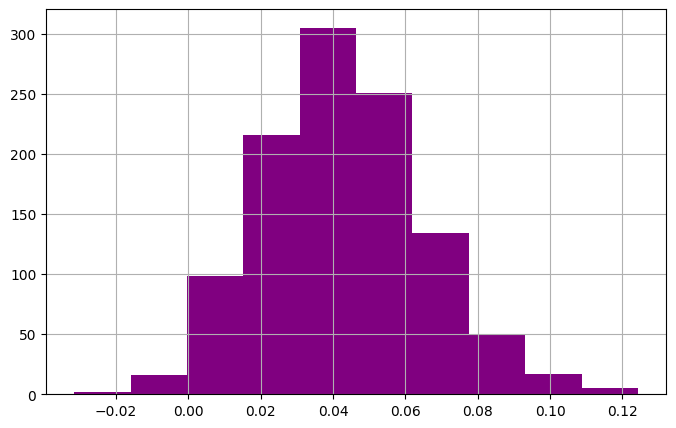

In [59]:
plt.figure(figsize = (8,5))
df_grouped['Polarity'].hist(color = 'purple')

**Polarity:**

- Polarity refers to the emotional tone or sentiment expressed in a piece of text, whether it is positive, negative, or neutral.
- It provides a quantitative measure of the sentiment, allowing algorithms to categorize text as expressing positive, negative, or neutral opinions or emotions.
- Polarity helps in understanding the overall sentiment of a piece of text, which is crucial for sentiment analysis tasks such as opinion mining, customer feedback analysis, and social media sentiment monitoring.
- In sentiment analysis applications, polarity scores are often used to classify text into sentiment categories or to quantify the strength of sentiment expressed in the text.

<Axes: >

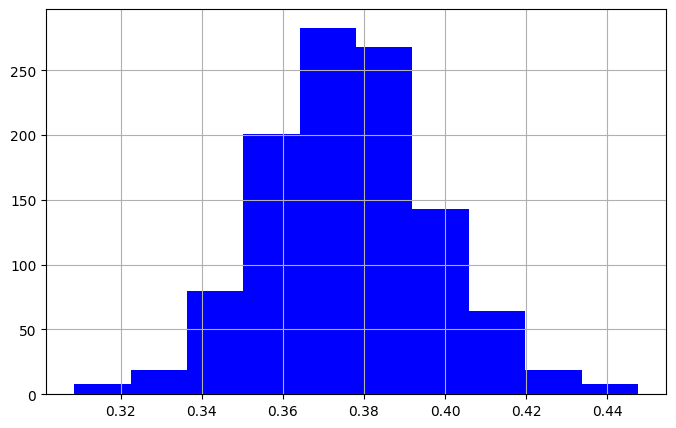

In [60]:
plt.figure(figsize = (8,5))
df_grouped['Subjectivity'].hist(color = 'blue')

**Subjectivity:**

- Subjectivity refers to the degree to which a piece of text expresses personal opinions, feelings, or beliefs rather than factual information.
- It helps distinguish between subjective and objective statements in text data. Subjective statements typically express opinions, emotions, or evaluations, while objective statements convey factual information.
- Subjectivity scores can be useful in sentiment analysis tasks to filter out non-opinionated or factual text, focusing only on subjective statements where sentiment analysis is relevant.
- Understanding the subjectivity of text can also aid in identifying the context and intent behind the language used, which is essential for accurate sentiment analysis.

In [36]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [37]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()


In [38]:
# Add sentiment scores to df_grouped
df_grouped['Compound'] = [sia.polarity_scores(v)['compound'] for v in df_grouped['cleaned_headline_text']]
df_grouped['Negative'] = [sia.polarity_scores(v)['neg'] for v in df_grouped['cleaned_headline_text']]
df_grouped['Neutral'] = [sia.polarity_scores(v)['neu'] for v in df_grouped['cleaned_headline_text']]
df_grouped['Positive'] = [sia.polarity_scores(v)['pos'] for v in df_grouped['cleaned_headline_text']]

# Display the first 5 rows of the DataFrame
df_grouped.head()


,publish_date,cleaned_headline_text,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2020-06-30,monday blue officegoers diesel price climb r l...,0.358308,0.051189,-0.9999,0.164,0.756,0.080
1,2020-07-01,bihar kg jardalu mango booked online case kolh...,0.358434,0.052150,-0.9998,0.169,0.723,0.108
2,2020-07-02,hc order dgp lodge fir sar court record tamper...,0.424989,0.022011,-0.9998,0.165,0.737,0.098
3,2020-07-03,four booked trespass assault guard verna polic...,0.350323,0.055244,-0.9998,0.165,0.748,0.087
4,2020-07-04,bihar public grievance department address rati...,0.363853,0.058018,-0.9998,0.158,0.750,0.092


## Predicting closing price of Nifty 50

In [40]:
df_grouped.rename(columns={'publish_date': 'Date'}, inplace=True)
df_merge=pd.merge(nifty_50_df, df_grouped, how='inner', on='Date')
df_merge.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA50,Daily Return,cleaned_headline_text,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2020-09-07,11359.599609,11381.150391,11251.700195,11355.049805,11355.049805,560300,11117.212012,NaN,vidya balan sonam kapoor taapsee pannu meet bo...,0.394597,0.017896,-0.9999,0.173,0.731,0.095
1,2020-09-08,11378.549805,11437.250000,11290.450195,11317.349609,11317.349609,572200,11137.517012,-0.003320,kilo ganja seized narsipatnam petrol pump owne...,0.408714,0.043362,-0.9999,0.178,0.720,0.102
2,2020-09-09,11218.599609,11298.150391,11185.150391,11278.000000,11278.000000,728900,11154.476016,-0.003477,drunk driver may get yr jail accident kolkatao...,0.366488,0.031833,-0.9999,0.175,0.729,0.096
3,2020-09-10,11363.299805,11464.049805,11327.400391,11449.250000,11449.250000,679400,11172.427012,0.015184,prabhu mundkur don intense look pradeep varmas...,0.379757,0.040178,-0.9998,0.168,0.731,0.100
4,2020-09-11,11447.799805,11493.500000,11419.900391,11464.450195,11464.450195,554800,11189.569023,0.001328,horoscope today september check astrological p...,0.354017,0.022466,-0.9998,0.165,0.735,0.100


In [41]:
df_final = df_merge[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
df_final

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,11355.049805,0.394597,0.017896,-0.9999,0.173,0.731,0.095
1,11317.349609,0.408714,0.043362,-0.9999,0.178,0.720,0.102
2,11278.000000,0.366488,0.031833,-0.9999,0.175,0.729,0.096
3,11449.250000,0.379757,0.040178,-0.9998,0.168,0.731,0.100
4,11464.450195,0.354017,0.022466,-0.9998,0.165,0.735,0.100
...,...,...,...,...,...,...,...
689,18771.250000,0.378874,0.031914,-0.9998,0.170,0.732,0.099
690,18665.500000,0.372902,0.027621,-0.9999,0.182,0.727,0.092
691,18691.199219,0.380673,0.016467,-0.9999,0.194,0.700,0.106
692,18817.400391,0.320499,0.033369,-0.9999,0.190,0.720,0.090


In [42]:
# Feature Scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df_scaled = pd.DataFrame(sc.fit_transform(df_final))
df_scaled.columns = df_final.columns
df_scaled.index = df_final.index
df_scaled.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.067287,0.618767,0.342678,0.00000,0.603306,0.536082,0.276316
1,0.062670,0.720326,0.519075,0.00000,0.644628,0.422680,0.368421
2,0.057852,0.416563,0.439214,0.00000,0.619835,0.515464,0.289474
3,0.078822,0.512018,0.497021,0.00005,0.561983,0.536082,0.342105
4,0.080683,0.326848,0.374333,0.00005,0.537190,0.577320,0.342105


In [139]:
df_scaled.head(10)

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.067287,0.618767,0.342678,0.00000,0.603306,0.536082,0.276316
1,0.062670,0.720326,0.519075,0.00000,0.644628,0.422680,0.368421
2,0.057852,0.416563,0.439214,0.00000,0.619835,0.515464,0.289474
3,0.078822,0.512018,0.497021,0.00005,0.561983,0.536082,0.342105
4,0.080683,0.326848,0.374333,0.00005,0.537190,0.577320,0.342105
5,0.077695,0.473028,0.350198,0.00000,0.818182,0.195876,0.368421
6,0.087705,0.350042,0.353220,0.00000,0.694215,0.525773,0.157895
7,0.097838,0.455146,0.524988,0.00000,0.578512,0.649485,0.184211
8,0.087007,0.260226,0.570603,0.00000,0.570248,0.701031,0.131579
9,0.085642,0.631518,0.393593,0.00000,0.685950,0.587629,0.092105


In [43]:
X=df_scaled.drop("Close",axis=1)
y=df_scaled["Close"]

In [44]:
# shuffle and split training and test sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)

In [45]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn import metrics

In [49]:
from sklearn.model_selection import RandomizedSearchCV


### Random Forest

In [50]:
# Random Forest Hyperparameter Tuning
rf_param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=rf_param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)
best_rf_params = rf_random.best_params_
print("Best Random Forest Parameters:", best_rf_params)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Random Forest Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': True}


In [54]:
## Using Random Forest Regression
rf = RandomForestRegressor(n_estimators=50, min_samples_split=5, min_samples_leaf=4, max_features='log2', max_depth=30, bootstrap=True)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mse_rf = metrics.mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("Random Forest Model RMSE: ", rmse_rf)


Random Forest Model RMSE:  0.22738406532753835


RMSE is often preferred because it penalizes large errors more heavily, making it useful when large errors are undesirable.

### AdaBoost

In [51]:
# AdaBoost Hyperparameter Tuning
adb_param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
}

adb_random = RandomizedSearchCV(estimator=adb, param_distributions=adb_param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
adb_random.fit(X_train, y_train)
best_adb_params = adb_random.best_params_
print("Best AdaBoost Parameters:", best_adb_params)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best AdaBoost Parameters: {'n_estimators': 100, 'learning_rate': 0.01}


In [56]:
## Using AdaBoostRegressor
adb = AdaBoostRegressor(n_estimators=100, learning_rate=0.01)
adb.fit(X_train, y_train)
y_pred_adb = adb.predict(X_test)

mse_adb = metrics.mean_squared_error(y_test, y_pred_adb)
rmse_adb = np.sqrt(mse_adb)

print("AdaBoost Model RMSE: ", rmse_adb)


AdaBoost Model RMSE:  0.218927143925311


### Xgboost

In [52]:
# XGBoost Hyperparameter Tuning
xgb_param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9],
    'n_estimators': [100, 500, 1000],
}

xgb_random = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
xgb_random.fit(X_train, y_train)
best_xgb_params = xgb_random.best_params_
print("Best XGBoost Parameters:", best_xgb_params)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best XGBoost Parameters: {'subsample': 0.7, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.7}


In [57]:
from xgboost import XGBRegressor

xgb = XGBRegressor(subsample=0.7, n_estimators=100, min_child_weight=1, max_depth=3, learning_rate=0.01, colsample_bytree=0.7)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

mse_xgb = metrics.mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

print("XGB Model RMSE: ", rmse_xgb)


XGB Model RMSE:  0.21220387072604072


### Creating RNN model

In [58]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
model_rnn = Sequential()


In [ ]:
# Adding first RNN layer and dropout regularization
model_rnn.add(SimpleRNN(units=50, activation="tanh", return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_rnn.add(Dropout(0.2))

# Adding second RNN layer and dropout regularization
model_rnn.add(SimpleRNN(units=50, activation="tanh", return_sequences=True))
model_rnn.add(Dropout(0.2))

# Adding third RNN layer and dropout regularization
model_rnn.add(SimpleRNN(units=50, activation="tanh", return_sequences=False))
model_rnn.add(Dropout(0.2))

# Adding the output layer
model_rnn.add(Dense(units=1))

# Compiling RNN
model_rnn.compile(optimizer="adam", loss="mean_squared_error")

# Fitting the RNN
model_rnn.fit(X_train, y_train, epochs=100, batch_size=32)

In [117]:
y_pred_rnn = model_rnn.predict(X_test)

5/5 [==============================] - 0s 4ms/step


In [128]:
# Flatten the array
y_pred_rnn = y_pred_rnn.flatten()

In [115]:
# Get the root mean squared error (RMSE)
mse_rnn = metrics.mean_squared_error(y_test, predictions_rnn)
rmse_rnn = np.sqrt(mse_rnn)

print("RNN Model RMSE: ",rmse_rnn)
# Get r2 score
r2_rnn = metrics.r2_score(y_test, predictions_rnn)
print("RNN Model r2: ",r2_rnn)

RNN Model RMSE:  0.22357793601025247
RNN Model r2:  -0.2251097297050293


### Plotting Train Data, Test Data and Predictions


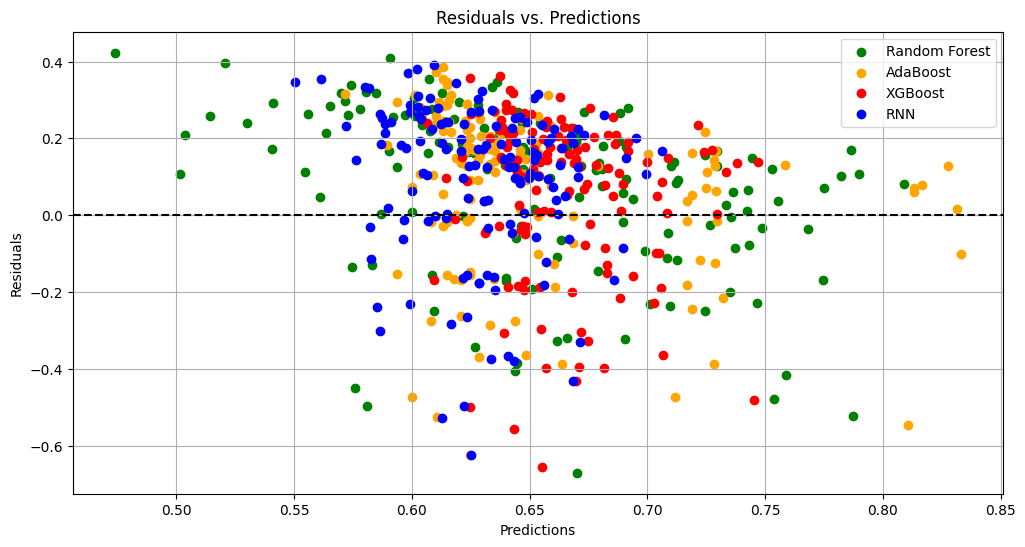

In [130]:
# Calculate residuals
residuals_rf = y_test - y_pred_rf
residuals_ab = y_test - y_pred_adb
residuals_xgb = y_test - y_pred_xgb
residuals_rnn = y_test - y_pred_rnn

# Plot residuals vs. predictions
plt.figure(figsize=(12, 6))

plt.scatter(y_pred_rf, residuals_rf, color='green', label='Random Forest')
plt.scatter(y_pred_adb, residuals_ab, color='orange', label='AdaBoost')
plt.scatter(y_pred_xgb, residuals_xgb, color='red', label='XGBoost')
plt.scatter(y_pred_rnn, residuals_rnn, color='blue', label='RNN')

plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs. Predictions')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()


The graph of residuals vs. predictions is a diagnostic plot commonly used in regression analysis to assess the quality of a regression model. Here's what the graph represents:

**Residuals**: The vertical axis (y-axis) represents the residuals, which are the differences between the actual target values (y_test) and the predicted values (y_pred) by the respective models. Residuals are essentially the errors made by the model in predicting the target variable.

**Predictions**: The horizontal axis (x-axis) represents the predicted values of the target variable made by the models (y_pred). Each point on the x-axis corresponds to a predicted value.

**Interpretation**:

- If the residuals are scattered randomly around the horizontal line at 0 (the dashed line in the plot), it indicates that the model's predictions are unbiased, and the errors are evenly distributed across the range of predictions.
- If there is a pattern in the residuals (e.g., residuals increase or decrease systematically as predictions increase), it suggests that the model may have some systematic error or bias in its predictions.
- Ideally, we want to see a random scattering of points around the zero line, indicating that the model's predictions are unbiased and accurate across the entire range of predicted values.